In [1]:
import dask
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=8,threads_per_worker=1)
client = Client(cluster)
dask.config.set({'distributed.nanny.environ.MALLOC_TRIM_THRESHOLD_': 10})

In [2]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 125.29 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45411,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 125.29 GiB
Comm: tcp://10.159.236.17:44897,Total threads: 1
Dashboard: http://10.159.236.17:33379/status,Memory: 15.66 GiB
Nanny: tcp://127.0.0.1:37889,


In [3]:
import xarray as xr
import numpy as np
import zarr
import matplotlib.pyplot as plt
from xmitgcm import llcreader

# PhiBot

In [4]:
model = llcreader.PleiadesLLC4320Model()
ds = model.get_dataset(varnames=['PhiBot'])

In [5]:
phibot_ts = ds.PhiBot.isel(time=np.arange(0,10000,3))#slice(0,2000))
phibot_index = phibot_ts.isel(face=1,j=1000,i=2000).load()

In [ ]:
phibot_ts.isel(face=1,j=slice(0,2160),i=slice(1080,1080+2160)
              ).where(phibot_index>20).mean('time').to_dataset().to_zarr('mean_phibot.zarr')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 10.23 GiB -- Worker memory limit: 15.66 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 10.07 GiB -- Worker memory limit: 15.66 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 9.72 GiB -- Worker memory limit: 15.66 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS;

In [7]:
test = xr.open_zarr('mean_phibot.zarr')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 11.73 GiB -- Worker memory limit: 15.66 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 11.73 GiB -- Worker memory limit: 15.66 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 11.73 GiB -- Worker memory limit: 15.66 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS

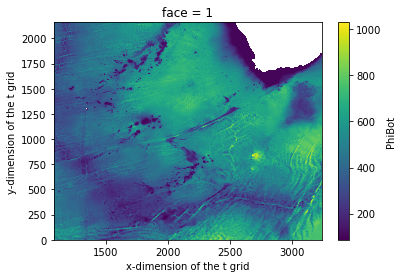

In [9]:
test.PhiBot.plot()

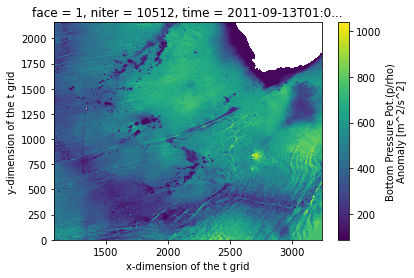

In [12]:
ds.PhiBot.isel(time=1,face=1,j=slice(0,2160),i=slice(1080,1080+2160)).plot()

In [6]:
cum_PhiBot = xr.zeros_like(ds.PhiBot.isel(time=0,face=1,j=slice(0,2160),i=slice(1080,1080+2160)))
counter = 0
for t in range(0,1000):
    if ds.PhiBot.isel(time=t,face=1,j=1000,i=2000)>20:
        cum_PhiBot = cum_PhiBot + ds.PhiBot.isel(time=t,face=1,j=slice(0,2160),i=slice(1080,1080+2160))
        counter = counter + 1
cum_PhiBot['counter'] = counter
cum_PhiBot.to_dataset().to_zarr('phibot_sum1000.zarr')

distributed.utils - ERROR - 'read_bytes_disk'
Traceback (most recent call last):
  File "/nobackup/csjone15/miniconda3/envs/pangeo-0ac8885/lib/python3.8/site-packages/distributed/utils.py", line 645, in log_errors
    yield
  File "/nobackup/csjone15/miniconda3/envs/pangeo-0ac8885/lib/python3.8/site-packages/distributed/dashboard/components/scheduler.py", line 850, in update
    x_read_disk.append(ws.metrics["read_bytes_disk"])
KeyError: 'read_bytes_disk'
distributed.utils - ERROR - 'read_bytes_disk'
Traceback (most recent call last):
  File "/nobackup/csjone15/miniconda3/envs/pangeo-0ac8885/lib/python3.8/site-packages/distributed/utils.py", line 645, in log_errors
    yield
  File "/nobackup/csjone15/miniconda3/envs/pangeo-0ac8885/lib/python3.8/site-packages/distributed/dashboard/components/scheduler.py", line 3211, in individual_doc
    fig.update()
  File "/nobackup/csjone15/miniconda3/envs/pangeo-0ac8885/lib/python3.8/site-packages/bokeh/core/property/validation.py", line 95, in fu

KeyboardInterrupt: 

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [14]:
counter=100
cum_PhiBot['counter'] = counter

In [6]:
phibot_ts.isel(face=1,j=slice(0,2160),i=slice(1080,1080+2160)
              ).where(phibot_ts.isel(face=1,j=1000,i=2000)>20
                                                            ).mean('time'
                                                              ).to_zarr('mean_2000.zarr')

Client Scheduler: tcp://127.0.0.1:42863 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 56 Memory: 134.53 GB


In [ ]:
#/nobackup/csjone15/surf_pres/

# Eta

In [4]:
model = llcreader.PleiadesLLC4320Model()
ds = model.get_dataset(varnames=['Eta'])

In [5]:
eta_ts = ds.Eta.isel(time=np.arange(0,10000,3))
eta_ts.isel(face=1,j=slice(0,2160),i=slice(1080,1080+2160)
              ).mean('time').to_dataset().to_zarr('mean_eta.zarr')

In [6]:
test = xr.open_zarr('mean_eta.zarr')

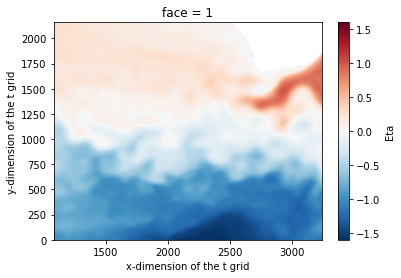

In [7]:
test.Eta.plot()